In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
dataset = pd.read_csv('../Files/titanic.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Histogram

In [3]:
fare_values = dataset.loc[(dataset['Fare'].notnull()) & (dataset['Fare'] != 0.0), 'Fare'].values  # Usuwam również wartość 0.0. Mogła to być np. załoga statku
fare_values.shape

(876,)

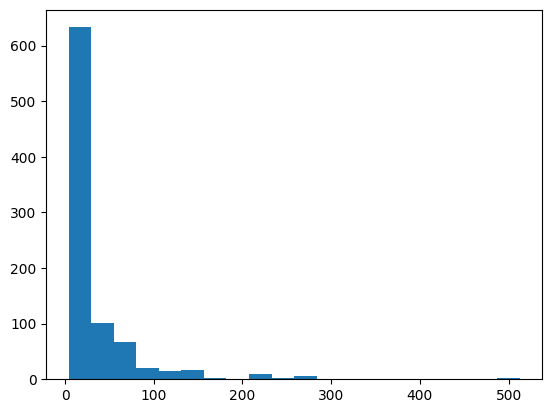

In [4]:
plt.hist(fare_values, bins=20)
plt.show()

###### Zdecydowana większość osób miała wykupione bilety w najniższej cenie. Tylko kilka osób zdecydowało się na bilet w cenie ok. 500

# Średnia

In [5]:
mean_fare = np.round(np.mean(fare_values))
mean_fare

33.0

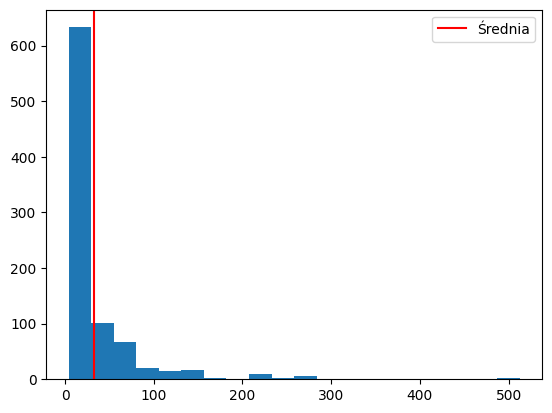

In [6]:
plt.hist(fare_values, bins=20)
plt.axvline(x=mean_fare,color='red',label='Średnia')
plt.legend(loc='upper right')
plt.show()

### Średnia cena biletu wynosiła 33

# Mediana

In [7]:
median_fare = np.median(fare_values).round(2)
median_fare

14.5

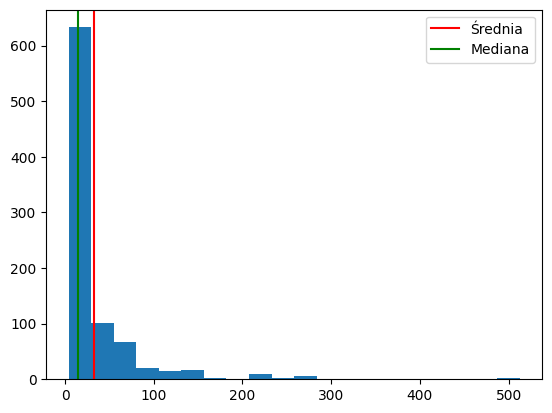

In [8]:
plt.hist(fare_values, bins=20)
plt.axvline(x=mean_fare,color='red',label='Średnia')
plt.axvline(x=median_fare,color='green',label='Mediana')
plt.legend(loc='upper right')
plt.show()

###### Mediana dla kolumny 'Fare' wynosi 14.50, czyli połowa pasażerów zapłaciła mniej a druga więcej niż 14.50 opłaty za bilet

# Moda

In [9]:
moda_fare = stats.mode(fare_values, keepdims=True)
moda_fare

ModeResult(mode=array([8.05]), count=array([43]))

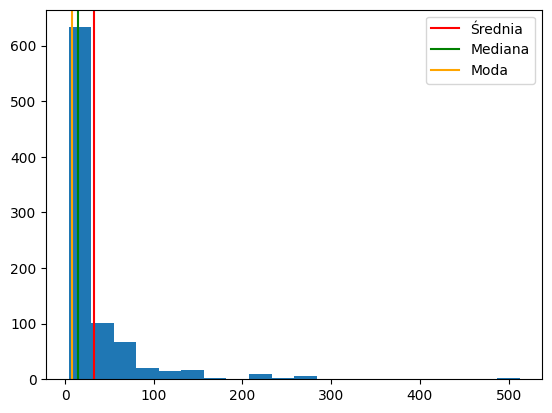

In [10]:
plt.hist(fare_values, bins=20)
plt.axvline(x=mean_fare,color='red',label='Średnia')
plt.axvline(x=median_fare,color='green',label='Mediana')
plt.axvline(x=moda_fare[0],color='orange',label='Moda')
plt.legend(loc='upper right')
plt.show()

###### Najwięcej biletów zostało sprzedanych w cenie 8.05 i były 43 takie bilety

In [11]:
q0 = np.quantile(fare_values, 0.0).round(2)
q1 = np.quantile(fare_values, 0.25).round(2)
q3 = np.quantile(fare_values, 0.75).round(2)
q4 = np.quantile(fare_values, 1.0).round(2)
print(f'Q0: {q0}')
print(f'Q1: {q1}')
print(f'Q2: {median_fare}')
print(f'Q3: {q3}')
print(f'Q4: {q4}')

Q0: 4.01
Q1: 7.92
Q2: 14.5
Q3: 31.28
Q4: 512.33


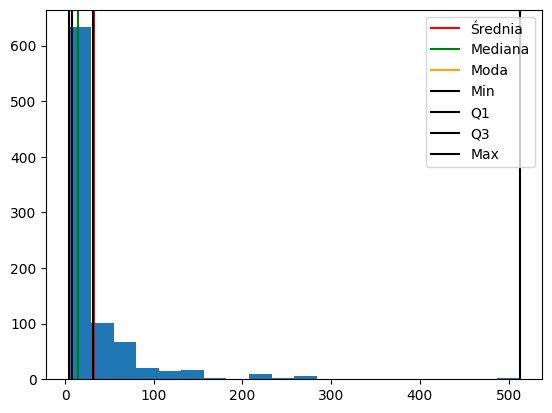

In [12]:
plt.hist(fare_values, bins=20)
plt.axvline(x=mean_fare,color='red',label='Średnia')
plt.axvline(x=median_fare,color='green',label='Mediana')
plt.axvline(x=moda_fare[0],color='orange',label='Moda')
plt.axvline(x = q0, color='black', label = 'Min')
plt.axvline(x = q1, color='black', label = 'Q1')
plt.axvline(x = q3, color='black', label = 'Q3')
plt.axvline(x = q4, color='black', label = 'Max')
plt.legend(loc='upper right')
plt.show()

###### Najtańszym biletem był bilet za 4.01, najdroższym natomiast bilet za 512.33. 25% pasażerów zakupiło bilety w cenie do 7.92. 25% pasażerów zapłaciło więcej niż 31.28

# Zakres

In [13]:
range_fare = max(fare_values) - min(fare_values)
range_fare.round(2)

508.32

###### Różnica w cenie najdroższego i najtańszego biletu wynosi 508.32

# Rozstęp międzykwartylowy - IQR

In [14]:
iqr = q3 - q1
iqr

23.36

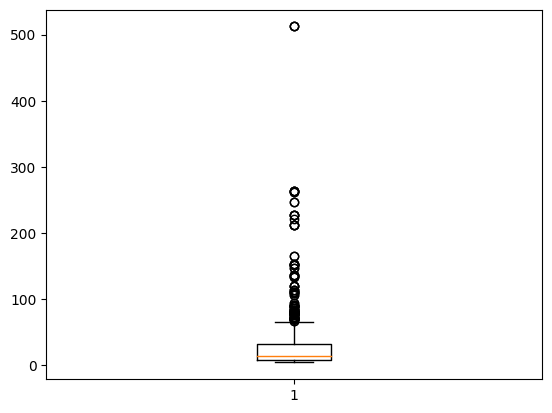

In [15]:
plt.boxplot(fare_values)
plt.show()

###### Różnica w cenie między kwartylem 3 i kwartylem 1 wynosi 23.36

# Wariancja

In [16]:
variance_fare = np.var(fare_values, ddof=1).round(2)
variance_fare

2493.69

###### Wariancja wynosi 2493.69, czyli suma każdej liczby w zbiorze oddalonej od średniej wynosi 2496.69

# Odchylenie Standardowe

In [17]:
print(variance_fare**(1/2)) # 1 sposób

49.93686013357268


In [18]:
standard_deviation_fare = np.std(fare_values, ddof=1)  # 2 sposób
standard_deviation_fare

49.93682576210329

###### Odchylenie standardowe wynosi 49.94. Wartość ta pokazuje jak bardzo wartości w próbce różnią się od średniej

# Skalowanie Zmiennej - StandardScaller

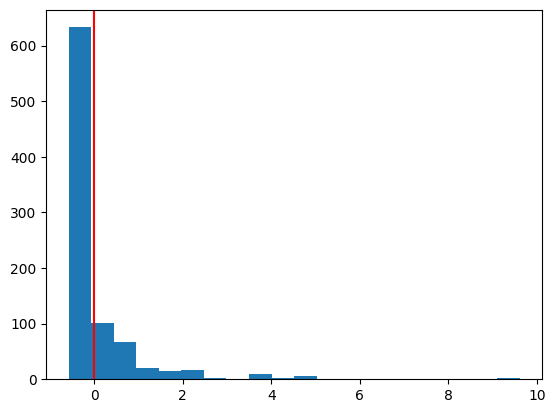

Średnia: 4.461170144612501e-17
Odchylenie standardowe: 1.0005712653993504


In [19]:
scaler_standardized = StandardScaler()
standardized_fare_values = scaler_standardized.fit_transform(fare_values.reshape(-1, 1))
plt.hist(standardized_fare_values, bins=20)
plt.axvline(x = standardized_fare_values.mean(), color='red', label = 'Średnia')
plt.show()
print(f'Średnia: {standardized_fare_values.mean()}')
print(f'Odchylenie standardowe: {np.std(standardized_fare_values, ddof=1)}')

# Skalowanie zmiennej - MinMax Scaller

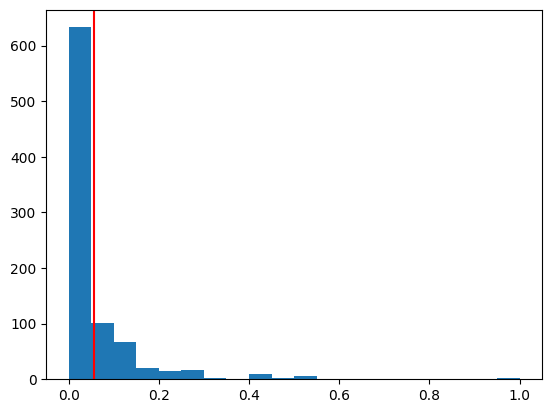

Średnia: 0.05654575166592943
Odchylenie standardowe: 0.09823959307672421


In [20]:
scaler_MinMax = MinMaxScaler()
normalized_fare_values = scaler_MinMax.fit_transform(fare_values.reshape(-1, 1))
plt.hist(normalized_fare_values, bins=20)
plt.axvline(x = normalized_fare_values.mean(), color='red', label = 'Średnia')
plt.show()
print(f'Średnia: {normalized_fare_values.mean()}')
print(f'Odchylenie standardowe: {np.std(normalized_fare_values, ddof=1)}')

# Korelacja

ValueError: x and y must be the same size

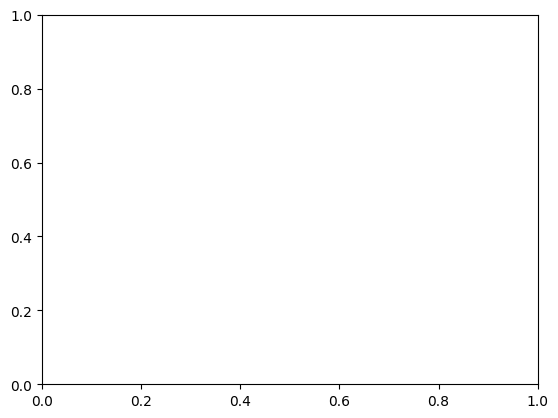

In [21]:
fare_sibsp_values = dataset.loc[dataset['Fare'].notnull(), 'SibSp'].values
plt.scatter(x=fare_values, y=fare_sibsp_values, alpha=0.5)
plt.xlabel('Fare')
plt.ylabel('SibSp')
plt.show()